# Heart Disease Analysis

Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

Data Exploration

In [2]:
df = pd.read_csv('data/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Data Descrbing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<AxesSubplot:title={'center':'Pearson Correlation of Heart disease Features'}>

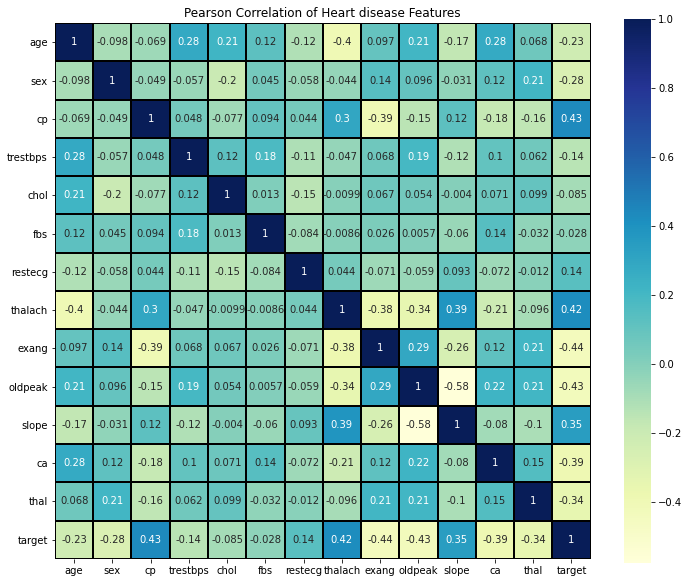

In [8]:
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Heart disease Features')
sns.heatmap(df.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black',annot=True)

In [9]:
df.shape

(303, 14)

Visualization

Text(0, 0.5, 'Frequency')

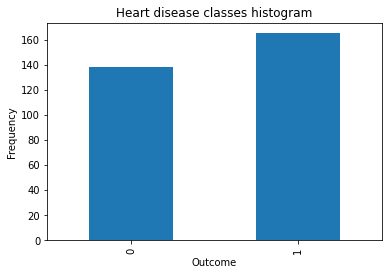

In [10]:
count_classes = pd.value_counts(df['target'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Heart disease classes histogram")
plt.xlabel("Outcome")
plt.ylabel("Frequency")

<AxesSubplot:>

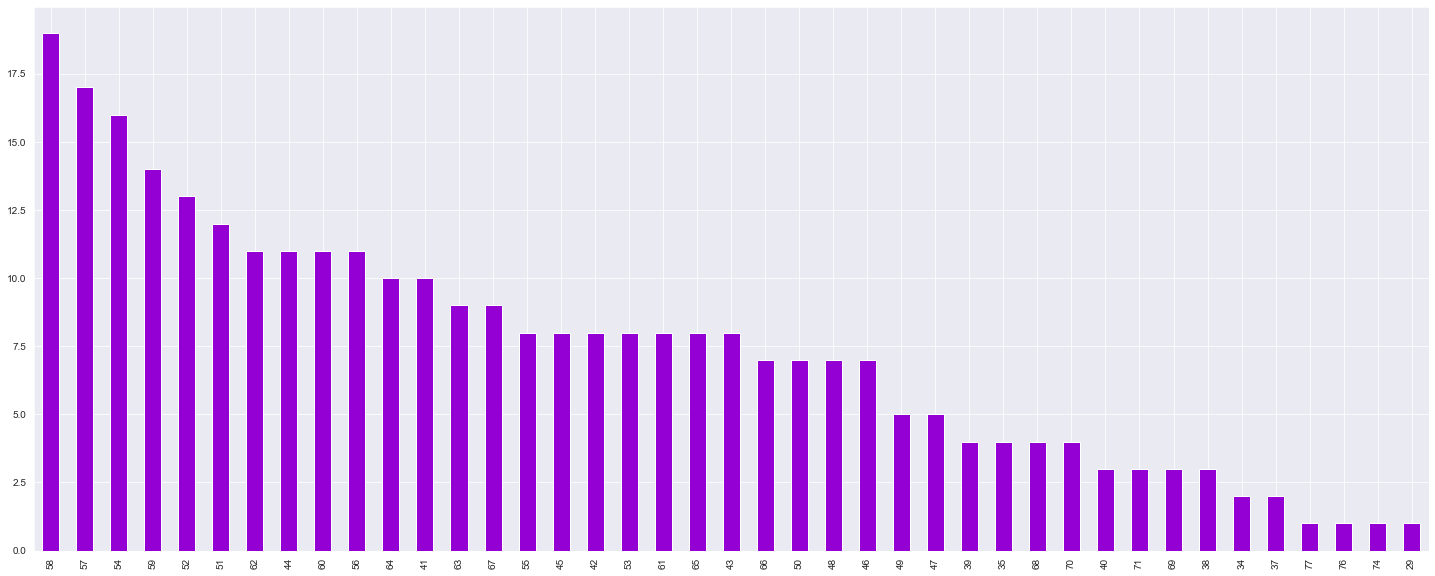

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
df['age'].value_counts().plot.bar(color='darkviolet')

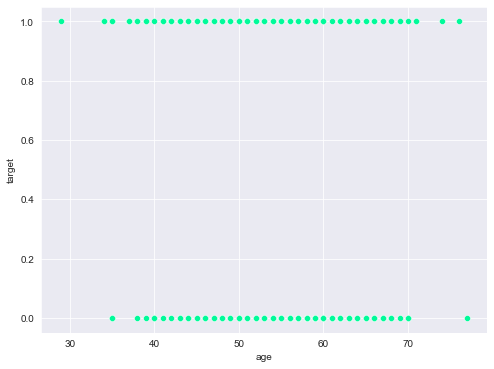

In [12]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="age", y="target",color='mediumspringgreen',data=df);
plt.show()

<AxesSubplot:xlabel='sex'>

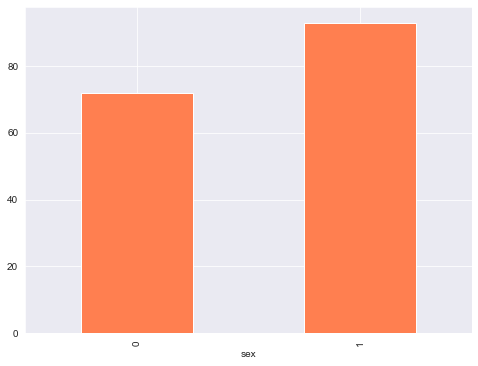

In [13]:
plt.figure(figsize=(8,6))
df.groupby('sex').sum()["target"].plot.bar(color='coral')

Data Splitting

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
X=df[['age', 'cp', 'trestbps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y=df['target']

In [17]:
X.head()

,age,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,3,145,0,150,0,2.3,0,0,1
1,37,2,130,1,187,0,3.5,0,0,2
2,41,1,130,0,172,0,1.4,2,0,2
3,56,1,120,1,178,0,0.8,2,0,2
4,57,0,120,1,163,1,0.6,2,0,2


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

ML Deployment

Support Vector Machine

In [19]:
from sklearn.svm import SVC
SVM = SVC()

In [20]:
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
predictions

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
val1 = (accuracy_score(y_test, predictions)*100)

In [22]:
print("*Accuracy score for SVM: ", val1, "\n")

*Accuracy score for SVM:  59.01639344262295 



Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [24]:
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
predictions

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [25]:
val2 = (accuracy_score(y_test, predictions)*100)

In [26]:
print("*Accuracy score for RF: ", val2, "\n")

*Accuracy score for RF:  80.32786885245902 



DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [28]:
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [29]:
val3 = (accuracy_score(y_test, predictions)*100)

In [30]:
print("*Accuracy score for DT: ", val3, "\n")

*Accuracy score for DT:  77.04918032786885 



KNeighborsClassifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [32]:
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)
predictions

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [33]:
val4 = (accuracy_score(y_test, predictions)*100)

In [34]:
print("*Accuracy score for KNN: ", val4)

*Accuracy score for KNN:  65.57377049180327


LogisticRegression

In [35]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [36]:
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)
predictions

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [37]:
val5 = (accuracy_score(y_test, predictions)*100)

In [38]:
print("*Accuracy score for LR: ", val5, "\n")

*Accuracy score for LR:  83.60655737704919 



Accuracy Comparsion

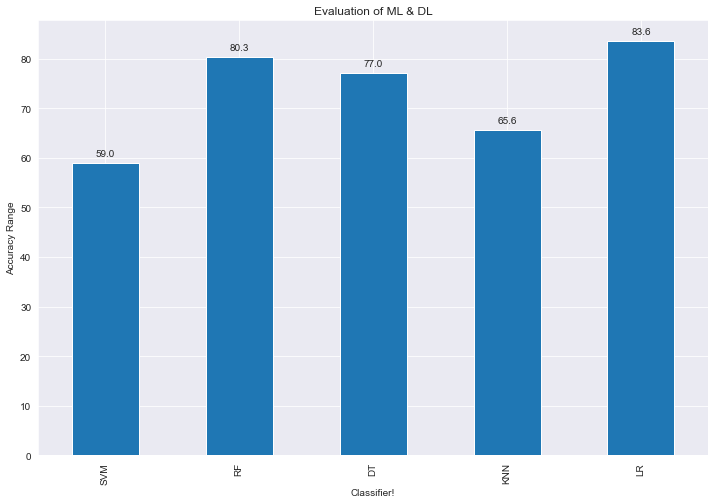

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


frequencies = [val1,val2,val3,val4,val5]
freq_series = pd.Series(frequencies)

x_labels = ['SVM', 'RF','DT','KNN','LR']


plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML & DL')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")

In [40]:
import joblib
filename = 'data/model_heart.sav'
joblib.dump(LR, filename)

['data/model_heart.sav']